In [78]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from pycaret.regression import RegressionExperiment

from etl import ETL
from feature_creation import FeatureCreation

plt.style.use("seaborn-v0_8")

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import get_scorer, get_scorer_names
from sklearn.model_selection import GridSearchCV

In [94]:
df_yield = pd.read_csv("data/barley_yield_from_1982.csv", sep=";")  # 1982 to 2018
df_climate = pd.read_parquet(
    "data/climate_data_from_1982.parquet"
)  # 1982-2014 2015-2050

In [95]:
df_yield, df_climate = ETL(df_yield, df_climate).run()

--- df_climate---
Departments/Scenario dropped because of any missing values:                                 department  scenario
date                                                
2015-01-01 12:00:00               Calvados  ssp2_4_5
2015-01-01 12:00:00            Deux_Sevres  ssp2_4_5
2015-01-01 12:00:00                Essonne  ssp2_4_5
2015-01-01 12:00:00                   Eure  ssp2_4_5
2015-01-01 12:00:00                  Rhone  ssp2_4_5
2015-01-01 12:00:00        Tarn_et_Garonne  ssp2_4_5
2015-01-01 12:00:00  Territoire_de_Belfort  ssp2_4_5
2015-01-01 12:00:00               Vaucluse  ssp2_4_5
--- df_yield ---
Departments dropped because of almost absolute absence of data:
 ['Hauts_de_Seine' 'Paris' 'Seine_SeineOise']


In [503]:
df_climate["department"].unique()

array(['Ain', 'Aisne', 'Allier', 'Alpes_Maritimes',
       'Alpes_de_Haute_Provence', 'Ardeche', 'Ardennes', 'Ariege', 'Aube',
       'Aude', 'Aveyron', 'Bas_Rhin', 'Bouches_du_Rhone', 'Calvados',
       'Cantal', 'Charente', 'Charente_Maritime', 'Cher', 'Correze',
       'Cote_d_Or', 'Cotes_d_Armor', 'Creuse', 'Deux_Sevres', 'Dordogne',
       'Doubs', 'Drome', 'Essonne', 'Eure', 'Eure_et_Loir', 'Finistere',
       'Gard', 'Gers', 'Gironde', 'Haut_Rhin', 'Haute_Garonne',
       'Haute_Loire', 'Haute_Marne', 'Haute_Saone', 'Haute_Savoie',
       'Haute_Vienne', 'Hautes_Alpes', 'Hautes_pyrenees', 'Herault',
       'Ille_et_Vilaine', 'Indre', 'Indre_et_Loire', 'Isere', 'Jura',
       'Landes', 'Loir_et_Cher', 'Loire', 'Loire_Atlantique', 'Loiret',
       'Lot', 'Lot_et_Garonne', 'Lozere', 'Maine_et_Loire', 'Manche',
       'Marne', 'Mayenne', 'Meurthe_et_Moselle', 'Meuse', 'Morbihan',
       'Moselle', 'Nievre', 'Nord', 'Oise', 'Orne', 'Pas_de_Calais',
       'Puy_de_Dome', 'Pyrenees_Atl

In [506]:
df_hist, df_forecast = FeatureCreation(df_yield, df_climate).run()

--- Amplitude feature created over phases ---
--- Threshold days feature created over phases ---
--- Temperature categories feature created ---
--- Consecutive days feature created ---


In [508]:
df_hist

,year,department,yield,area,production,scenario,code_dep,daily_NSA_temp_amplitude_Q1,daily_NSA_temp_amplitude_Q2,daily_NSA_temp_amplitude_Q3,...,growth_within,maturation_above,maturation_below,maturation_within,max_consecutive_above_germination,max_consecutive_above_growth,max_consecutive_above_maturation,max_consecutive_below_germination,max_consecutive_below_growth,max_consecutive_below_maturation
0,1982,Ain,3.950080,16065.0,63458.0,historical,01,19.501831,19.293884,15.172821,...,93.0,0.0,10.0,51.0,0.0,0.0,0.0,61.0,25.0,6.0
1,1983,Ain,2.648276,14500.0,38400.0,historical,01,18.292297,18.553345,16.015930,...,80.0,0.0,24.0,37.0,0.0,0.0,0.0,61.0,46.0,12.0
2,1984,Ain,4.822580,15500.0,74750.0,historical,01,21.210449,19.159363,15.992889,...,87.0,0.0,21.0,40.0,0.0,0.0,0.0,61.0,31.0,9.0
3,1985,Ain,4.196770,15500.0,65050.0,historical,01,17.951660,21.640381,8.846832,...,83.0,0.0,22.0,39.0,0.0,0.0,0.0,61.0,32.0,11.0
4,1986,Ain,3.598450,12900.0,46420.0,historical,01,15.292114,21.908600,12.199310,...,97.0,0.0,23.0,38.0,0.0,0.0,0.0,61.0,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,2010,Yvelines,7.037840,9624.0,67732.2,historical,78,12.858643,22.911469,12.179871,...,134.0,13.0,3.0,45.0,0.0,0.0,9.0,61.0,9.0,2.0
2933,2011,Yvelines,6.155870,8766.0,53962.4,historical,78,15.492645,17.581879,14.265411,...,137.0,2.0,7.0,52.0,0.0,0.0,2.0,61.0,21.0,2.0
2934,2012,Yvelines,7.675490,9100.0,69847.0,historical,78,16.795593,20.079193,19.806976,...,125.0,6.0,6.0,49.0,0.0,0.0,5.0,61.0,16.0,6.0
2935,2013,Yvelines,7.043820,10360.0,72974.0,historical,78,15.895905,20.940186,15.685059,...,133.0,6.0,1.0,54.0,0.0,0.0,2.0,61.0,14.0,1.0


In [509]:
df_forecast

,year,scenario,department,code_dep,daily_NSA_temp_amplitude_Q1,daily_NSA_temp_amplitude_Q2,daily_NSA_temp_amplitude_Q3,daily_NSA_temp_amplitude_Q4,daily_NSA_temp_mean_Q1,daily_NSA_temp_mean_Q2,...,growth_within,maturation_above,maturation_below,maturation_within,max_consecutive_above_germination,max_consecutive_above_growth,max_consecutive_above_maturation,max_consecutive_below_germination,max_consecutive_below_growth,max_consecutive_below_maturation
0,2015,ssp1_2_6,Ain,01,11.738373,22.835358,22.317291,20.416016,276.865204,286.207550,...,85.0,2.0,7.0,52.0,0.0,0.0,2.0,61.0,26.0,6.0
1,2016,ssp1_2_6,Ain,01,14.805573,16.056213,13.140747,19.678406,279.027893,285.609863,...,116.0,0.0,7.0,54.0,0.0,0.0,0.0,61.0,24.0,7.0
2,2017,ssp1_2_6,Ain,01,17.372681,20.297424,11.332092,18.838562,275.093353,286.320190,...,96.0,0.0,6.0,55.0,0.0,0.0,0.0,61.0,33.0,4.0
3,2018,ssp1_2_6,Ain,01,18.234802,15.198212,11.735962,25.785767,277.419281,285.208649,...,100.0,0.0,21.0,40.0,0.0,0.0,0.0,53.0,28.0,7.0
4,2019,ssp1_2_6,Ain,01,12.973999,21.493591,16.736206,14.886719,276.362579,285.093018,...,90.0,1.0,24.0,36.0,0.0,0.0,1.0,61.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,2046,ssp5_8_5,Yvelines,78,14.077454,24.115509,15.519806,18.629150,279.256866,287.483246,...,132.0,22.0,3.0,36.0,0.0,3.0,8.0,61.0,16.0,2.0
9320,2047,ssp5_8_5,Yvelines,78,16.145782,20.733887,17.373383,22.464966,278.578094,287.481323,...,123.0,22.0,3.0,36.0,0.0,0.0,10.0,56.0,14.0,2.0
9321,2048,ssp5_8_5,Yvelines,78,15.410065,17.898407,21.749695,18.188293,277.136200,288.146027,...,111.0,10.0,6.0,45.0,0.0,3.0,5.0,61.0,23.0,4.0
9322,2049,ssp5_8_5,Yvelines,78,13.058807,19.879333,18.834961,20.051270,279.944061,288.088013,...,146.0,11.0,2.0,48.0,0.0,0.0,6.0,61.0,9.0,2.0


# Prepare data


In [ ]:
df_hist_2014 = df_hist[df_hist["year"] <= 2014]

In [512]:
df_forecast_126 = df_forecast[df_forecast["scenario"] == "ssp1_2_6"]
df_forecast_245 = df_forecast[df_forecast["scenario"] == "ssp2_4_5"]
df_forecast_585 = df_forecast[df_forecast["scenario"] == "ssp5_8_5"]

In [513]:
# Filter data after 2030
df_forecast_126 = df_forecast_126[df_forecast_126["year"] <= 2030].reset_index(
    drop=True
)
df_forecast_245 = df_forecast_245[df_forecast_245["year"] <= 2030].reset_index(
    drop=True
)
df_forecast_585 = df_forecast_585[df_forecast_585["year"] <= 2030].reset_index(
    drop=True
)

In [514]:
df_hist_train = df_hist_2014
target = "yield"
dep_cols = list(df_hist_train.columns[df_hist_train.columns.str.contains("dep")])
print("Dropped Department columns : ", dep_cols)
df_hist_train = df_hist_train.drop(columns=["production", "scenario"] + dep_cols)

Dropped Department columns :  ['department', 'code_dep']


In [515]:
df_hist_train.head()

,year,yield,area,daily_NSA_temp_amplitude_Q1,daily_NSA_temp_amplitude_Q2,daily_NSA_temp_amplitude_Q3,daily_NSA_temp_amplitude_Q4,daily_NSA_temp_mean_Q1,daily_NSA_temp_mean_Q2,daily_NSA_temp_mean_Q3,...,growth_within,maturation_above,maturation_below,maturation_within,max_consecutive_above_germination,max_consecutive_above_growth,max_consecutive_above_maturation,max_consecutive_below_germination,max_consecutive_below_growth,max_consecutive_below_maturation
0,1982,3.950080,16065.0,19.501831,19.293884,15.172821,23.353577,277.258392,284.543488,291.057281,...,93.0,0.0,10.0,51.0,0.0,0.0,0.0,61.0,25.0,6.0
1,1983,2.648276,14500.0,18.292297,18.553345,16.015930,26.968567,275.036713,285.042694,289.147247,...,80.0,0.0,24.0,37.0,0.0,0.0,0.0,61.0,46.0,12.0
2,1984,4.822580,15500.0,21.210449,19.159363,15.992889,21.758179,275.993958,284.692688,289.896545,...,87.0,0.0,21.0,40.0,0.0,0.0,0.0,61.0,31.0,9.0
3,1985,4.196770,15500.0,17.951660,21.640381,8.846832,23.074890,274.739990,284.293854,290.097107,...,83.0,0.0,22.0,39.0,0.0,0.0,0.0,61.0,32.0,11.0
4,1986,3.598450,12900.0,15.292114,21.908600,12.199310,20.551178,277.031097,284.711151,289.784210,...,97.0,0.0,23.0,38.0,0.0,0.0,0.0,61.0,19.0,10.0


# Baseline model comparison


We will use pycaret to quickly compare the performance of different models on the dataset before actually selecting the best model for further tuning.


In [ ]:
s = RegressionExperiment()
s.setup(df_hist_train, target=target, session_id=123)

,Description,Value
0,Session id,123
1,Target,yield
2,Target type,Regression
3,Original data shape,"(2934, 70)"
4,Transformed data shape,"(2934, 70)"
5,Transformed train set shape,"(2053, 70)"
6,Transformed test set shape,"(881, 70)"
7,Numeric features,68
8,Categorical features,1
9,Preprocess,True


In [28]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4904,0.3944,0.6274,0.7885,0.1163,0.1110,0.3270
et,Extra Trees Regressor,0.5101,0.4175,0.6452,0.7766,0.1203,0.1169,0.2620
xgboost,Extreme Gradient Boosting,0.5323,0.4656,0.6815,0.7510,0.1267,0.1213,0.1640
rf,Random Forest Regressor,0.5629,0.5065,0.7103,0.7292,0.1303,0.1277,0.7130
gbr,Gradient Boosting Regressor,0.5686,0.5160,0.7171,0.7243,0.1311,0.1285,0.5160
ada,AdaBoost Regressor,0.6923,0.7304,0.8534,0.6104,0.1523,0.1549,0.1720
lr,Linear Regression,0.6890,0.7496,0.8638,0.6009,0.1566,0.1550,0.3300
ridge,Ridge Regression,0.7055,0.7884,0.8857,0.5812,0.1591,0.1587,0.0150
br,Bayesian Ridge,0.7071,0.7898,0.8865,0.5805,0.1592,0.1592,0.0150
en,Elastic Net,0.8333,1.0749,1.0356,0.4276,0.1855,0.1916,0.0130


In [38]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Feature Selection Boruta


In [ ]:
from BorutaShap import BorutaShap

feat_selector = BorutaShap(importance_measure="shap", classification=False)
feat_selector.fit(
    X=df_hist_train.drop(columns=[target]),
    y=df_hist_train[target],
    n_trials=20,
    random_state=123,
)

  0%|          | 0/20 [00:00<?, ?it/s]

26 attributes confirmed important: ['rainy_days_maturation', 'frost_days_germination', 'maturation_below', 'max_consecutive_within_growth', 'rainy_days_growth', 'amp_max_daily_NSA_temp_Q4', 'amp_daily_NSA_temp_Q2', 'max_consecutive_within_maturation', 'year', 'growth_below', 'max_consecutive_below_growth', 'area', 'amp_daily_NSA_temp_Q1', 'amp_precipitation_Q1', 'rainy_days_germination', 'amp_precipitation_Q2', 'amp_max_daily_NSA_temp_Q3', 'max_consecutive_below_maturation', 'heat_days_maturation', 'amp_max_daily_NSA_temp_Q2', 'amp_precipitation_Q4', 'amp_daily_NSA_temp_Q3', 'amp_max_daily_NSA_temp_Q1', 'maturation_within', 'amp_precipitation_Q3', 'amp_daily_NSA_temp_Q4']
17 attributes confirmed unimportant: ['heat_days_germination', 'annual_precip_within', 'max_consecutive_above_growth', 'max_consecutive_above_germination', 'frost_days_maturation', 'annual_precip_below', 'max_consecutive_within_germination', 'max_consecutive_above_maturation', 'growth_above', 'germination_below', 'ger

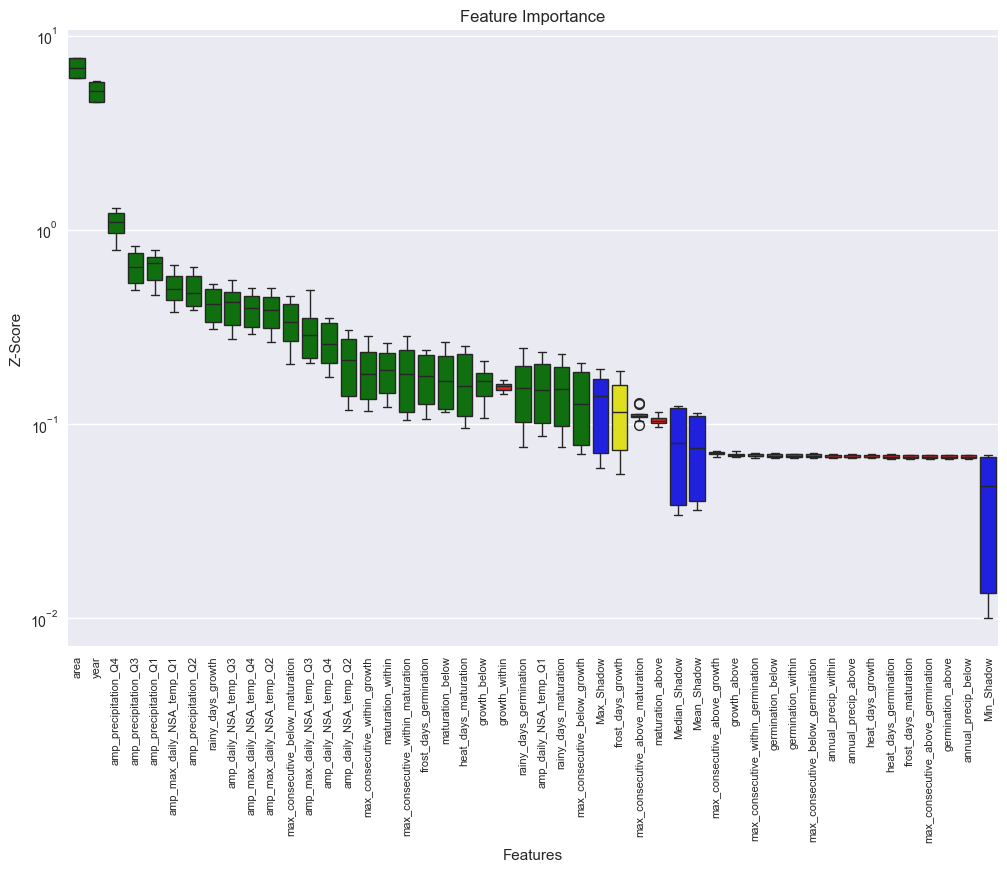

In [9]:
feat_selector.plot(which_features="all")

In [11]:
feat_selector.results_to_csv("boruta_shap_results.csv")

In [12]:
selected_feat = feat_selector.accepted
rejected_feat = feat_selector.rejected
tentative_feat = feat_selector.tentative

# Feature Selection with XGBoost


In [521]:
# We will add a random feature to the features and train XGBoost model. We will drop all the features with an importance score lower than the random feature.

X = df_hist_train.drop(columns=[target])
y = df_hist_train[target]
n = 30
removed_features = set()
for i in range(n):
    # Add a random feature
    X["random_feature"] = np.random.rand(X.shape[0])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    model = XGBRegressor()
    model.fit(X_train, y_train)

    importance = model.feature_importances_

    importance_df = pd.DataFrame(
        {"feature": X.columns, "importance": importance}
    ).sort_values("importance", ascending=False)

    to_remove = importance_df[importance_df["importance"] < importance[-1]]["feature"]
    removed_features.update(to_remove)

removed_features = list(removed_features)

In [522]:
final_rejected = list(set(rejected_feat) | set(removed_features))
final_rejected = removed_features
final_rejected

['daily_NSA_temp_amplitude_Q1',
 'max_consecutive_above_germination',
 'growth_above',
 'germination_within',
 'max_consecutive_below_germination',
 'maturation_below',
 'heat_days_growth',
 'growth_within',
 'max_consecutive_above_growth',
 'germination_above',
 'precipitation_amplitude_Q2',
 'daily_NSA_temp_mean_Q1',
 'precipitation_mean_Q3',
 'heat_days_germination',
 'frost_days_maturation',
 'max_consecutive_above_maturation',
 'daily_NSA_temp_amplitude_Q2',
 'germination_below',
 'max_daily_NSA_temp_amplitude_Q3']

# Train Test Split


In [523]:
target = "yield"
X = df_hist_train.drop(columns=[target] + final_rejected)
y = df_hist_train[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [524]:
X_train

,year,area,daily_NSA_temp_amplitude_Q3,daily_NSA_temp_amplitude_Q4,daily_NSA_temp_mean_Q2,daily_NSA_temp_mean_Q3,daily_NSA_temp_mean_Q4,daily_NSA_temp_std_Q1,daily_NSA_temp_std_Q2,daily_NSA_temp_std_Q3,...,frost_days_growth,heat_days_maturation,rainy_days_germination,rainy_days_growth,rainy_days_maturation,growth_below,maturation_above,maturation_within,max_consecutive_below_growth,max_consecutive_below_maturation
456,2009,19193.0,11.734161,16.814484,284.431824,289.324463,280.711945,2.331518,4.193372,2.596056,...,4.0,0.0,14.0,56.0,9.0,39.0,0.0,41.0,9.0,8.0
462,1982,4600.0,12.932312,22.884277,281.654602,287.499542,276.907135,3.532819,4.587971,2.789939,...,46.0,0.0,18.0,106.0,15.0,128.0,0.0,29.0,52.0,14.0
2172,2009,21300.0,14.077026,17.942566,284.482239,289.388153,279.264252,2.643805,4.859591,3.218661,...,9.0,2.0,21.0,87.0,19.0,64.0,0.0,37.0,16.0,9.0
2666,2008,8018.0,19.529510,19.550903,287.354675,296.015167,282.085907,3.441145,4.546358,3.426882,...,6.0,19.0,15.0,36.0,6.0,59.0,8.0,45.0,16.0,7.0
381,2000,4200.0,16.650574,18.637299,286.230011,290.732788,278.825714,6.888518,3.904988,3.894207,...,64.0,1.0,28.0,37.0,4.0,94.0,0.0,49.0,60.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2003,24734.0,16.750305,18.942993,287.485870,292.326202,280.623627,4.257564,4.986282,3.986963,...,27.0,3.0,21.0,39.0,9.0,60.0,3.0,54.0,13.0,4.0
1095,1988,6800.0,14.212128,21.743591,284.634827,290.158112,276.368683,3.371803,4.795822,3.755274,...,48.0,4.0,13.0,27.0,9.0,120.0,0.0,47.0,36.0,9.0
1130,1990,28500.0,13.889069,17.637970,287.842773,294.546875,281.656433,2.962461,5.838854,3.208239,...,15.0,20.0,8.0,66.0,9.0,82.0,9.0,52.0,19.0,0.0
1294,1989,4600.0,12.407379,15.656403,283.836060,289.520966,281.151611,2.962099,3.902030,3.129971,...,17.0,0.0,41.0,113.0,20.0,87.0,0.0,39.0,41.0,8.0


# Grid Search


In [525]:
from skopt import BayesSearchCV
from skopt.plots import plot_objective

In [526]:
from search_grids import bayes_search_params, grid_search_params

score_names = [
    "r2",
    "neg_mean_absolute_error",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_percentage_error",
]

models = {
    "LGBMRegressor": LGBMRegressor(verbose=-1),
    # "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
}

In [528]:
for model_name, model in models.items():
    print("----------", model_name, "----------")
    pipe = Pipeline([("scaler", StandardScaler()), (model_name, model)])
    scorer = get_scorer("neg_mean_absolute_error")
    search = GridSearchCV(
        pipe,
        grid_search_params[model_name],
        scoring=scorer,
        cv=5,
        # n_iter=20,
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    print("-- TRAIN")
    for score_name in score_names:
        scorer = get_scorer(score_name)
        score = scorer(best_model, X_train, y_train)
        print(score_name, " : ", score)
    print("-- TEST")
    for score_name in score_names:
        scorer = get_scorer(score_name)
        score = scorer(best_model, X_test, y_test)
        print(score_name, " : ", score)

---------- LGBMRegressor ----------
-- TRAIN
r2  :  0.9665863604034123
neg_mean_absolute_error  :  -0.19160349615196529
neg_root_mean_squared_error  :  -0.24582653117838751
neg_mean_absolute_percentage_error  :  -0.04286600602738925
-- TEST
r2  :  0.8073205197979618
neg_mean_absolute_error  :  -0.48240547830136093
neg_root_mean_squared_error  :  -0.6216058597021591
neg_mean_absolute_percentage_error  :  -0.11826824471214101
---------- XGBRegressor ----------
-- TRAIN
r2  :  0.9765526670965616
neg_mean_absolute_error  :  -0.16021328788682013
neg_root_mean_squared_error  :  -0.20592713898409923
neg_mean_absolute_percentage_error  :  -0.0351523833587549
-- TEST
r2  :  0.7915245205465307
neg_mean_absolute_error  :  -0.5110872573313106
neg_root_mean_squared_error  :  -0.6465838567970892
neg_mean_absolute_percentage_error  :  -0.12496530865997309


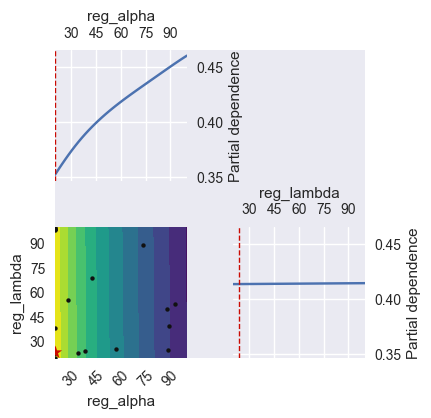

In [337]:
_ = plot_objective(
    bayes_search.optimizer_results_[0],
    dimensions=["reg_alpha", "reg_lambda"],
    n_minimum_search=int(1e8),
)

# Evaluation


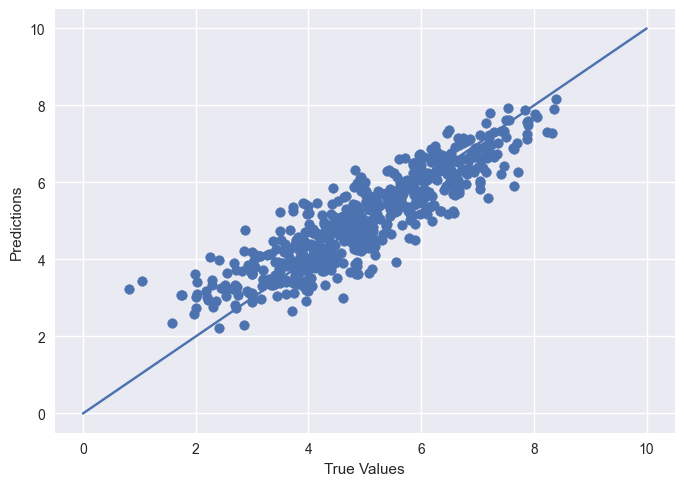

In [529]:
# Plot y_test vs y_pred
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

_ = plt.plot([0, 10], [0, 10])

plt.show()

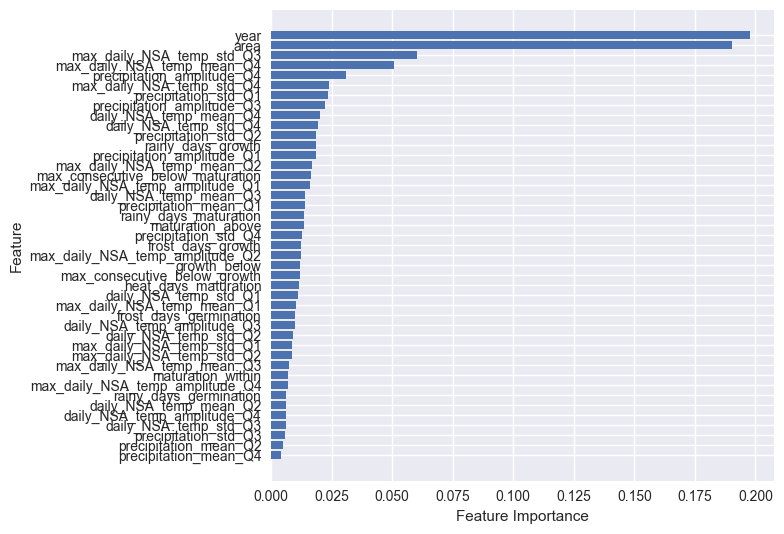

In [554]:
# Plot feature importances of the best model

feature_importances = best_model[-1].feature_importances_
feature_names = X_train.columns
sorted_idx = feature_importances.argsort()

plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Prediction formatting


In [ ]:
def predict_format(df_area, df_predict, model, col_to_drop, target):
    departments = df_predict["department"]
    scenario = df_predict["scenario"]
    code_dep = df_predict["code_dep"]
    # If the df_predict is not historical, it needs to get the last historical data
    if df_area["year"].max() <= df_predict["year"].min():
        # Assing to each row of df_predict the "area" of the last historical year from df_hist where department are matching
        df_predict = df_predict.merge(
            df_area[df_area["year"] == df_area["year"].max()][
                ["area", "department", "code_dep"]
            ],
            on=["department", "code_dep"],
            how="left",
        )
    else:
        df_predict = df_predict.drop(columns=target)
    df_predict = df_predict.drop(
        columns=col_to_drop + ["department", "code_dep", "scenario"]
    )
    # Re arrange the order of the columns to put area as second column (to reproduce the same order as the training set)
    cols = df_predict.columns.tolist()
    cols = cols[:1] + cols[-1:] + cols[1:-1]
    df_predict = df_predict[cols]
    y_pred = model.predict(df_predict)
    df_predict["yield_pred"] = y_pred
    df_predict["department"] = departments
    df_predict["scenario"] = scenario
    df_predict["code_dep"] = code_dep
    return df_predict

In [580]:
df_pred_126 = predict_format(
    df_hist_2014, df_forecast_126, best_model, final_rejected, target
)
df_pred_245 = predict_format(
    df_hist_2014, df_forecast_245, best_model, final_rejected, target
)
df_pred_585 = predict_format(
    df_hist_2014, df_forecast_585, best_model, final_rejected, target
)

dfs_pred = {"ssp126": df_pred_126, "ssp245": df_pred_245, "ssp585": df_pred_585}

# Evaluate the prediction (2015-2018) on the climate forecast


In [ ]:
df_hist_2018 = df_yield[df_yield.index.year > 2014].reset_index()
df_hist_2018["year"] = df_hist_2018["year"].apply(lambda x: x.year)
df_hist_2018

,year,department,yield,area,production
0,2015,Ain,6.90,8165.0,56717.50
1,2016,Ain,5.47,9530.0,52129.10
2,2017,Ain,6.57,9300.0,61101.00
3,2018,Ain,6.19,8870.0,54905.30
4,2015,Aisne,8.40,46850.0,391473.00
...,...,...,...,...,...
371,2018,Yonne,6.10,78610.0,479521.00
372,2015,Yvelines,8.00,11420.0,91400.50
373,2016,Yvelines,5.30,12225.0,64792.50
374,2017,Yvelines,7.31,13735.0,100402.85


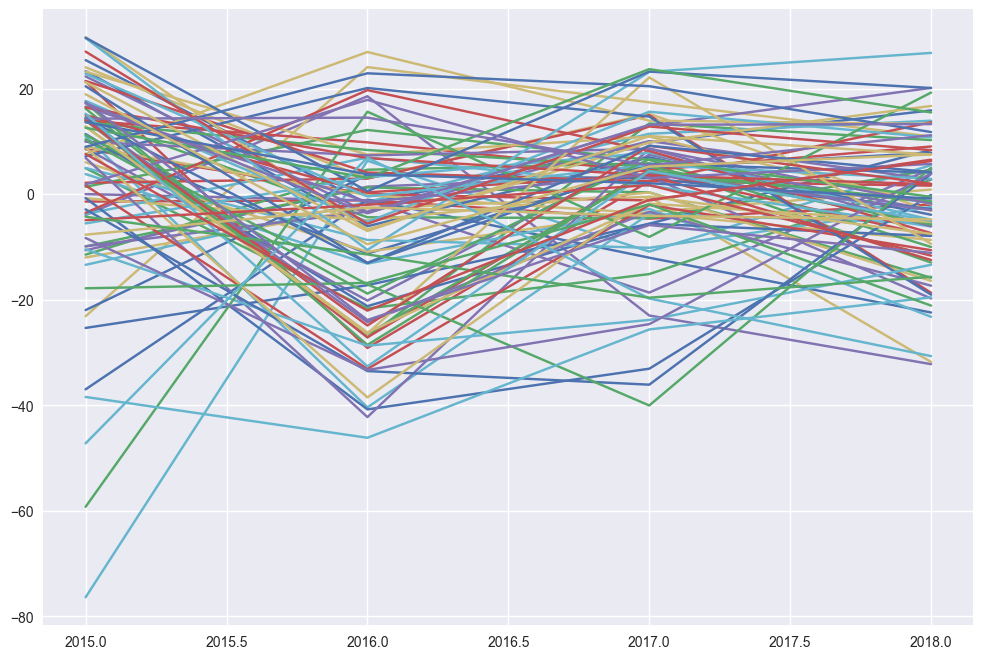

In [643]:
error_pct_dict = {}
for dep in df_pred_126["department"].unique():
    # Filter to keep only prediction between 2015 and 2018
    df_pred_126_dep = df_pred_126[
        (df_pred_126["department"] == dep) & (df_pred_126["year"] <= 2018)
    ]
    # Calculate the percentage precision of the prediction between df_hist_2018 and df_pred_126_dep
    df_hist_2018_dep = df_hist_2018[df_hist_2018["department"] == dep]
    df_hist_2018_dep = df_hist_2018_dep.merge(
        df_pred_126_dep[["year", "yield_pred"]], on="year", how="left"
    )
    pct_error = (
        (df_hist_2018_dep["yield"] - df_hist_2018_dep["yield_pred"])
        / df_hist_2018_dep["yield"]
    ) * 100
    df_hist_2018_dep["pct_error"] = pct_error
    error_pct_dict[dep] = df_hist_2018_dep[["pct_error", "year"]]

# Plot the percentage error for each department
fig, ax = plt.subplots(figsize=(12, 8))
for dep, pct_error in error_pct_dict.items():
    plt.plot(pct_error["year"], pct_error["pct_error"], label=dep)

# Yield Moyen France


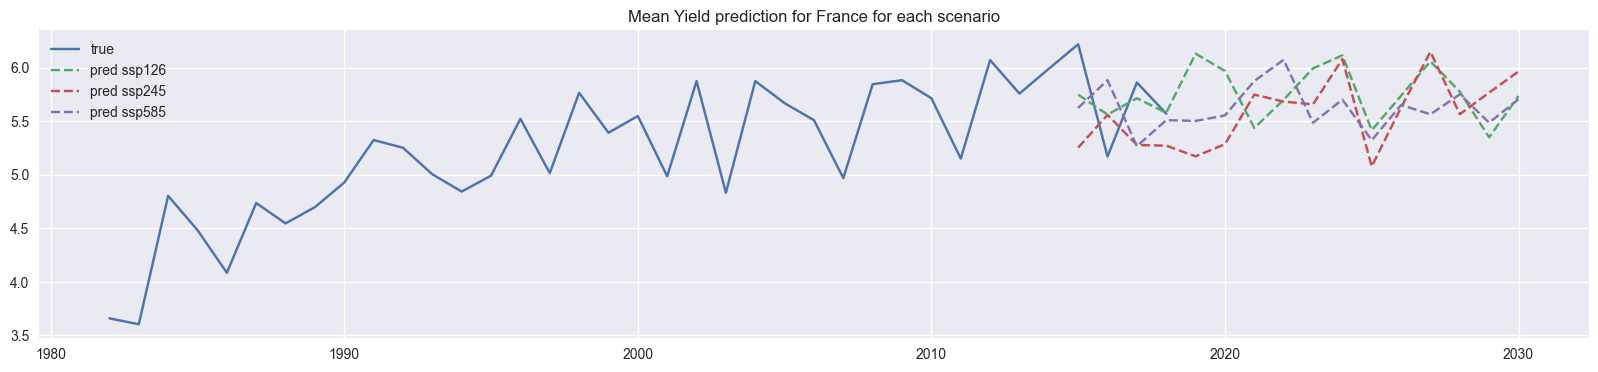

In [665]:
plt.figure(figsize=(20, 4))

df_france = df_hist_2014.groupby("year").mean(numeric_only=True)["yield"]
df_france = pd.concat(
    [df_france, df_hist_2018.groupby("year").mean(numeric_only=True)["yield"]]
)
plt.plot(df_france.index, df_france, label="true")

for scenario, df_scenario in dfs_pred.items():
    df_france = df_scenario.groupby("year").mean(numeric_only=True)["yield_pred"]
    plt.plot(df_france.index, df_france, label="pred " + scenario, linestyle="--")

plt.title("Mean Yield prediction for France for each scenario")
plt.legend()
plt.show()

# Top departements France


In [651]:
# We want to get for each year the top 10 department with the highest yield
# Let's do a sankey plot to see the evolution of the top 5 department over the years
n_top = 10
top_per_year = {}
dep_rank = {}
for year in df_pred_126["year"].unique():
    df_year = df_pred_126[df_pred_126["year"] == year]
    top_per_year[year] = df_year.nlargest(n_top, "yield_pred")["department"].tolist()
    df_year["rank"] = df_year["yield_pred"].rank(ascending=False)
    for dep in df_year["department"].unique():
        if dep not in dep_rank:
            dep_rank[dep] = []
        dep_rank[dep].append(df_year[df_year["department"] == dep]["rank"].values[0])

## Get the top 10 departements with the highest yield


In [652]:
dep_rank = pd.DataFrame(dep_rank)
dep_rank.index = df_pred_126["year"].unique()
dep_rank.mean().sort_values(ascending=True).head(10)

Somme              4.7500
Pas_de_Calais      6.3750
Seine_Maritime     8.5000
Ardennes           9.2500
Aisne              9.3125
Seine_et_Marne     9.8125
Finistere         10.1250
Eure              10.4375
Eure_et_Loir      13.3750
Calvados          15.8125
dtype: float64

## Plot difference between the top 10 departements and the average yield


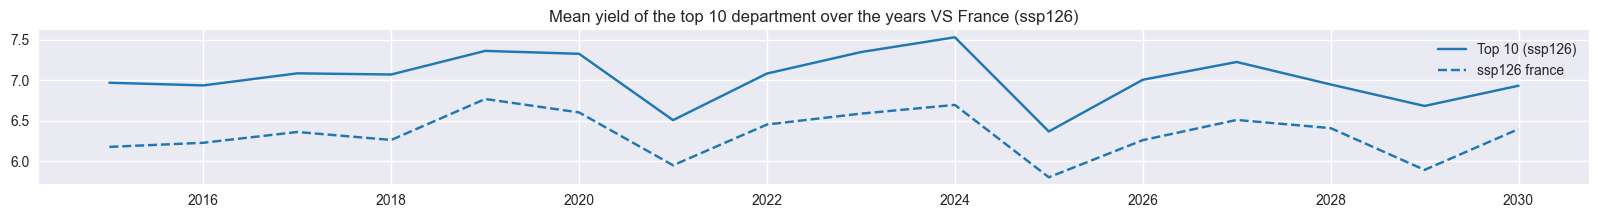

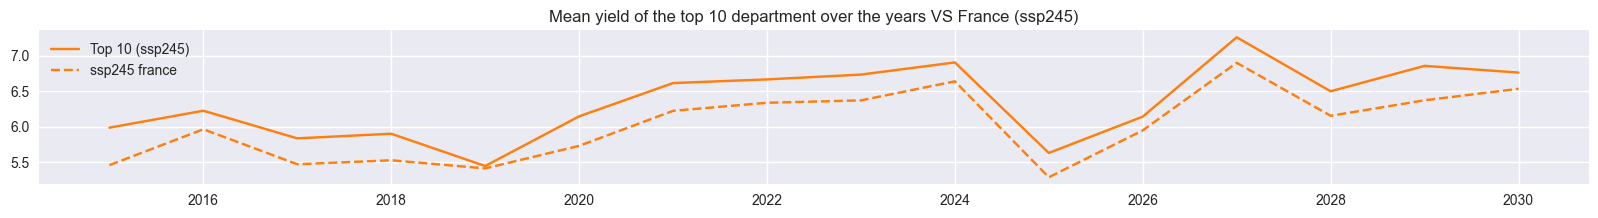

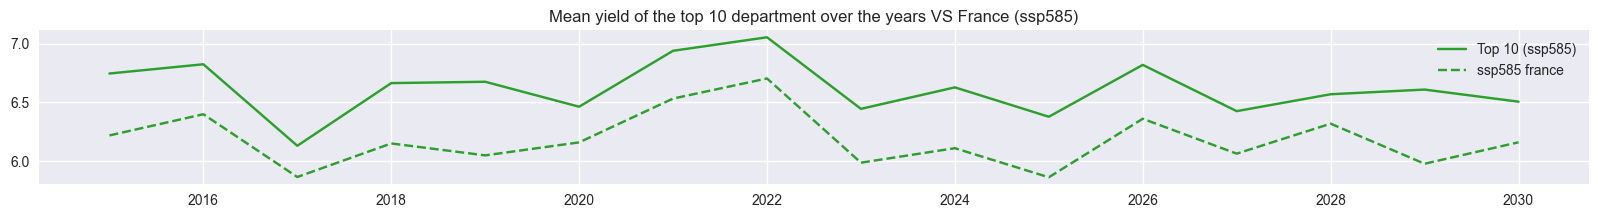

In [ ]:
mean_france_list = {"ssp126": [], "ssp245": [], "ssp585": []}
mean_top_list = {"ssp126": [], "ssp245": [], "ssp585": []}
for year in top_per_year.keys():
    for scenario, df_scenario in dfs_pred.items():
        df_year = df_scenario[df_scenario["year"] == year]
        df_year["weighted_yield"] = (
            df_year["yield_pred"] * df_year["area"] / df_year["area"].sum()
        )
        mean_france = df_year["weighted_yield"].sum()
        df_top_5 = df_year[df_year["department"].isin(top_per_year[year])]
        mean_top = (
            df_top_5["yield_pred"] * df_top_5["area"] / df_top_5["area"].sum()
        ).sum()
        mean_top_list[scenario].append(mean_top)
        mean_france_list[scenario].append(mean_france)


colors = list(plt.cm.tab10.colors)
for scenario, mean_top in mean_top_list.items():
    fig, ax = plt.subplots(figsize=(20, 2))
    color = colors.pop(0)
    plt.plot(
        list(top_per_year.keys()),
        mean_top,
        label=f"Top {n_top} ({scenario})",
        color=color,
    )
    plt.plot(
        list(top_per_year.keys()),
        mean_france_list[scenario],
        label=scenario + " france",
        linestyle="--",
        color=color,
    )
    plt.title(
        f"Mean yield of the top {n_top} department over the years VS France ({scenario})"
    )
    plt.legend()
    plt.show()

In [411]:
import plotly.express as px
import seaborn as sns

year_list = sorted(list(df_pred_126["year"].unique()))
df_pred_126["posi"] = [year_list.index(year) for year in df_pred_126["year"]]

df_pred_126["rank"] = df_pred_126.groupby("year")["yield_pred"].rank(ascending=False)

list_dist = list(set(df_pred_126["department"]))
pal = list(sns.color_palette(palette="Spectral", n_colors=len(list_dist)).as_hex())
dict_color = dict(zip(list_dist, pal))

fig = px.scatter(
    df_pred_126,
    x="posi",
    y="rank",
    size="yield_pred",
    color="department",
    text="department",
    color_discrete_map=dict_color,
    animation_frame="year",
    animation_group="department",
    range_x=[-2, len(year_list)],
    range_y=[0.5, 6.5],
)

fig.update_xaxes(title="", visible=False)
fig.update_yaxes(autorange="reversed", title="Rank", visible=True, showticklabels=True)
fig.update_layout(
    xaxis=dict(showgrid=False), yaxis=dict(showgrid=True), width=2000, height=2000
)
fig.update_traces(textposition="middle left")
fig.show()

# Shap Values (Impact of each feature on the prediction)


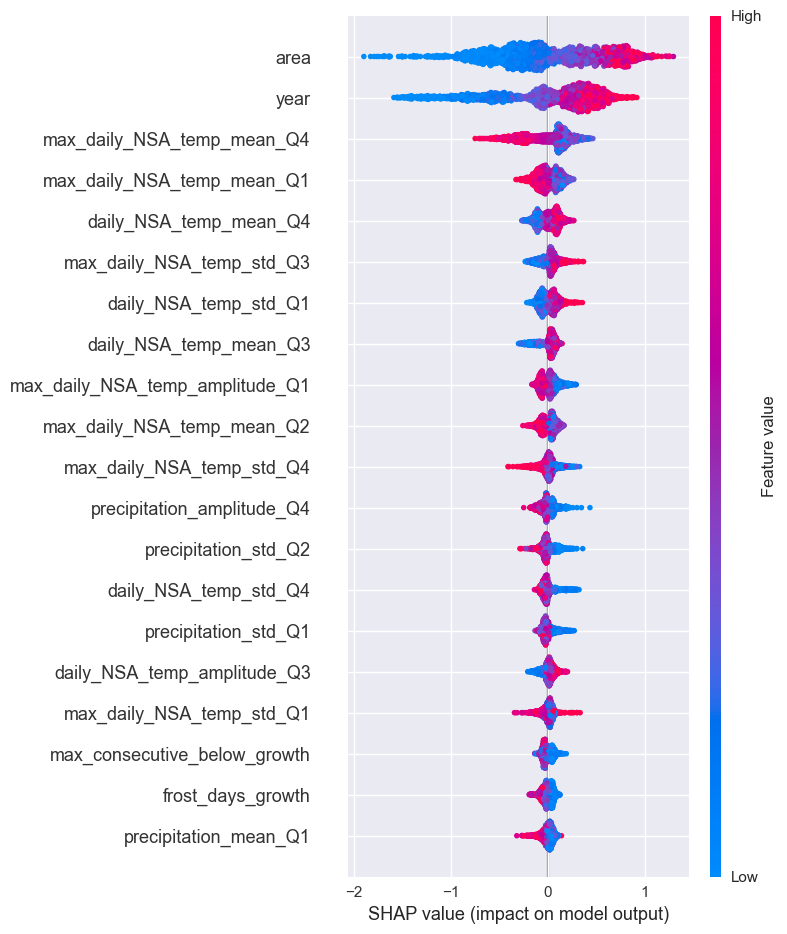

In [552]:
import shap

regressor = best_model[-1]
scaler = best_model[0]
explainer = shap.Explainer(regressor)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
shap_values = explainer(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled)

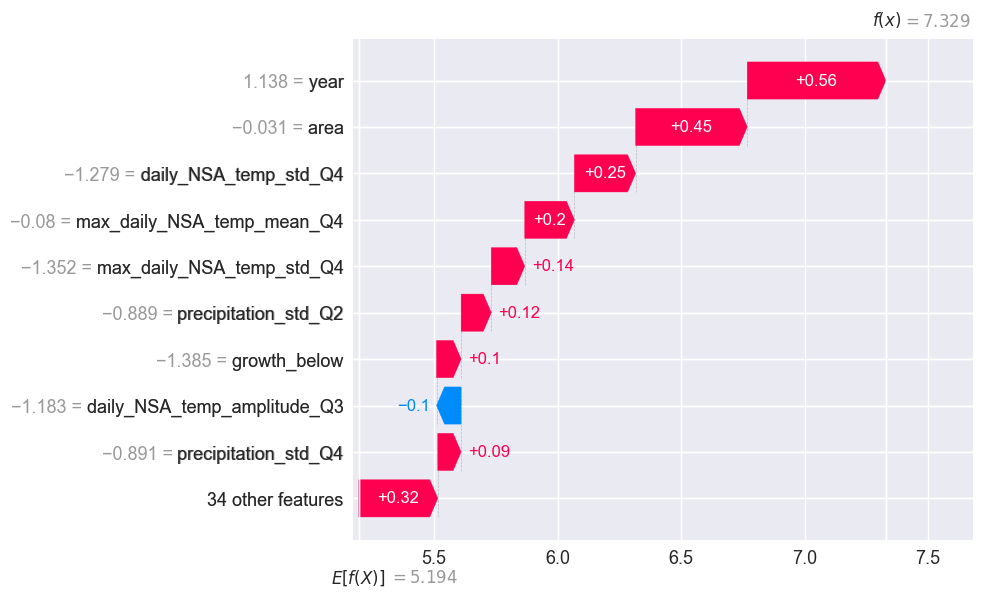

In [553]:
shap.waterfall_plot(shap_values[0])

# Visualisation on the Map


In [ ]:
import geopandas as gpd

url_shapefile = (
    "https://github.com/gregoiredavid/france-geojson/raw/master/departements.geojson"
)
map_df = gpd.read_file(url_shapefile)  # Read the GeoJSON file into a GeoDataFrame

In [561]:
df_pred_126

,year,area,daily_NSA_temp_amplitude_Q3,daily_NSA_temp_amplitude_Q4,daily_NSA_temp_mean_Q2,daily_NSA_temp_mean_Q3,daily_NSA_temp_mean_Q4,daily_NSA_temp_std_Q1,daily_NSA_temp_std_Q2,daily_NSA_temp_std_Q3,...,rainy_days_growth,rainy_days_maturation,growth_below,maturation_above,maturation_within,max_consecutive_below_growth,max_consecutive_below_maturation,yield_pred,department,scenario
0,2015,7350.0,22.317291,20.416016,286.207550,291.882629,278.086029,2.818761,4.925275,4.312538,...,50.0,9.0,97.0,2.0,52.0,26.0,6.0,5.145915,Ain,ssp1_2_6
1,2016,7350.0,13.140747,19.678406,285.609863,290.751282,279.529480,3.097974,4.207793,2.920630,...,59.0,16.0,67.0,0.0,54.0,24.0,7.0,5.567270,Ain,ssp1_2_6
2,2017,7350.0,11.332092,18.838562,286.320190,292.349609,278.192383,4.506082,5.448828,2.629587,...,58.0,11.0,86.0,0.0,55.0,33.0,4.0,5.924684,Ain,ssp1_2_6
3,2018,7350.0,11.735962,25.785767,285.208649,291.751862,279.452606,4.232385,3.452312,3.044300,...,65.0,16.0,82.0,0.0,40.0,28.0,7.0,5.206169,Ain,ssp1_2_6
4,2019,7350.0,16.736206,14.886719,285.093018,291.622803,279.356354,2.818969,4.187741,3.862950,...,42.0,20.0,92.0,1.0,36.0,14.0,7.0,6.006454,Ain,ssp1_2_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,2026,10180.0,18.565613,20.052246,285.452667,292.788879,280.886414,4.383204,4.815662,4.472276,...,16.0,7.0,61.0,7.0,48.0,20.0,3.0,5.915636,Yvelines,ssp1_2_6
1420,2027,10180.0,18.956757,18.371307,286.739990,294.384796,281.180664,2.463705,5.673420,4.988654,...,25.0,6.0,58.0,10.0,48.0,11.0,3.0,6.685383,Yvelines,ssp1_2_6
1421,2028,10180.0,15.693634,22.209412,287.694397,292.696198,282.109924,3.063911,5.867786,4.081923,...,6.0,4.0,79.0,7.0,51.0,31.0,3.0,6.371882,Yvelines,ssp1_2_6
1422,2029,10180.0,16.551239,22.138153,288.984131,294.400299,281.611542,4.088389,5.102263,3.832568,...,14.0,2.0,69.0,7.0,53.0,13.0,1.0,6.033030,Yvelines,ssp1_2_6


<Axes: >

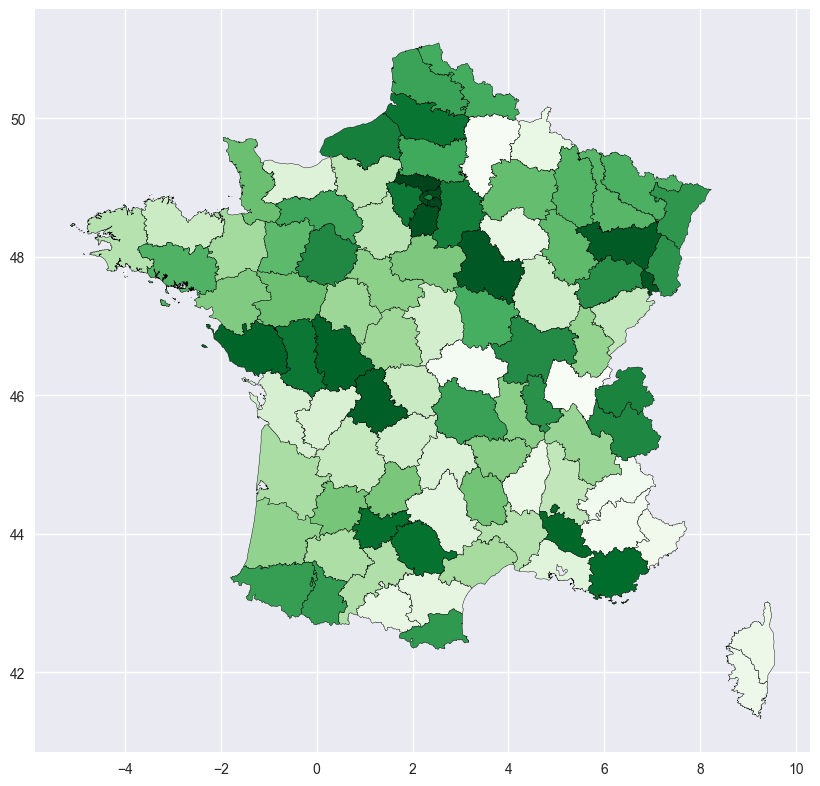

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_merged = map_df.merge(
    df_pred_126[df_pred_126["year"] == 2024], left_on="code", right_on="code_dep"
)
map_df.plot(
    ax=ax,
    color="white",
    edgecolor="black",
    column="yield_pred",
    legend=True,
    cmap="Greens",
)

In [587]:
import os

output_path = "charts_pred/maps"
if not os.path.exists(output_path):
    os.makedirs(output_path)
# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = df_pred_126["year"].unique()

In [ ]:
df_merged = pd.merge(map_df, df_pred_126, left_on="code", right_on="code_dep")[
    ["geometry", "department", "yield_pred", "year"]
]

vmin, vmax = df_merged["yield_pred"].min(), df_merged["yield_pred"].max()
for year in list_of_years:
    # filter the data for the specific year
    df_year = df_merged[df_merged["year"] == year]

    # plot the map
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    df_year.plot(
        column="yield_pred",
        ax=ax,
        legend=True,
        edgecolor="black",
        vmin=vmin,
        vmax=vmax,
        norm=plt.Normalize(vmin=vmin, vmax=vmax),
        cmap="Greens",
    )

    # Add big annotation of the year in bottom left corner
    ax.annotate(
        year,
        xy=(0, 0),
        xycoords="axes fraction",
        xytext=(20, 20),
        textcoords="offset points",
        ha="left",
        va="bottom",
        fontsize=20,
    )

    plt.title(f"Barley yield in France in {year}")
    plt.savefig(f"{output_path}/barley_yield_in_france_in_{year}.png")
    plt.close()

    i += 1

In [620]:
# Concat the images to make a gif
import imageio

images = []
for year in list_of_years:
    images.append(imageio.imread(f"{output_path}/barley_yield_in_france_in_{year}.png"))

duration = 5  # seconds
nb_frames = len(list_of_years)
fps = int(nb_frames / duration)

imageio.mimsave(f"GIFYield_pred.gif", images, "GIF", fps=fps)